In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import tree
import pandas as pd
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [ ]:
df.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


In [ ]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200.0,NaN,NaN,NaN,44.315,16.544315,15.0,31.0,45.0,58.0,74.0
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200.0,NaN,NaN,NaN,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,DrugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(200, 6)

In [ ]:
df.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.columns


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.tail()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
df.groupby('Drug').mean()


,Age,Na_to_K
Drug,,
DrugY,43.747253,22.374780
drugA,35.869565,10.918783
drugB,62.500000,11.524375
drugC,42.500000,10.633750
drugX,44.018519,10.650556


In [ ]:
df.nunique()


Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
print(df['Sex'].nunique())
df['Sex'].value_counts()


2


M    104
F     96
Name: Sex, dtype: int64

In [ ]:
print(df['BP'].nunique())
df['BP'].value_counts()


3


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
print(df['Cholesterol'].nunique())
df['Cholesterol'].value_counts()


2


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
print(df['Na_to_K'].nunique())
df['Na_to_K'].value_counts()


198


12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64

In [ ]:
print(df['Age'].nunique())
df['Age'].value_counts()


57


47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

In [ ]:
df.Sex = df.Sex.map({'M':1,'F':2}) 

In [ ]:
df.BP = df.BP.map({'HIGH':2,'NORMAL':1,'LOW':0})

In [ ]:
df.Cholesterol = df.Cholesterol.map({'HIGH':1,'NORMAL':0})

In [ ]:
df.Drug = df.Drug.map({'DrugY':1,'drugX':2 ,'drugA':3 , 'drugC':4,'drugB':5 })

In [ ]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,1,25.355,1
1,47,1,0,1,13.093,4
2,47,1,0,1,10.114,4
3,28,2,1,1,7.798,2
4,61,2,0,1,18.043,1


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Sex,200.0,1.480000,0.500854,1.000,1.0000,1.0000,2.00,2.000
BP,200.0,1.065000,0.839224,0.000,0.0000,1.0000,2.00,2.000
Cholesterol,200.0,0.515000,0.501029,0.000,0.0000,1.0000,1.00,1.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200.0,2.060000,1.270619,1.000,1.0000,2.0000,3.00,5.000


In [ ]:
cor = df.corr()
cor


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.102027,-0.120918,0.068234,-0.063119,0.160692
Sex,-0.102027,1.000000,0.044952,-0.008811,0.125008,-0.092860
BP,-0.120918,0.044952,1.000000,-0.032208,0.036871,0.142413
Cholesterol,0.068234,-0.008811,-0.032208,1.000000,-0.010000,0.116981
Na_to_K,-0.063119,0.125008,0.036871,-0.010000,1.000000,-0.593746
Drug,0.160692,-0.092860,0.142413,0.116981,-0.593746,1.000000


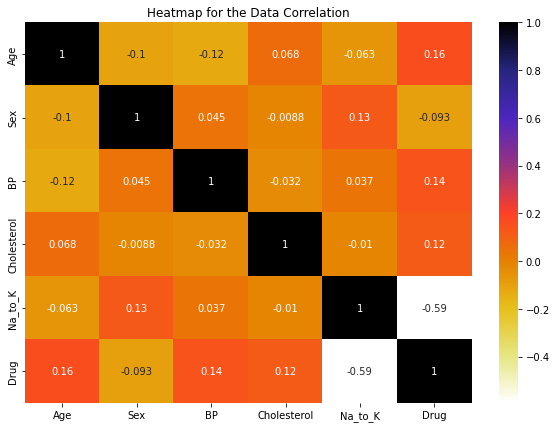

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Heatmap for the Data Correlation')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug', axis = 1)
y = df.Drug

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 45, stratify=y)

In [ ]:
X_train.shape, X_test.shape


((140, 5), (60, 5))

NAIVE BAYES

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

print("Train Accuracy : %.2f" % naive_bayes.score(X_train, y_train))
print("Test Accuracy : %.2f" % naive_bayes.score(X_test, y_test))


Train Accuracy : 0.88
Test Accuracy : 0.80


In [ ]:
y_pred = naive_bayes.predict(X_test)

print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix : 
[[17  0  5  3  2]
 [ 2 14  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  5]]

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.63      0.74        27
           2       1.00      0.88      0.93        16
           3       0.58      1.00      0.74         7
           4       0.62      1.00      0.77         5
           5       0.71      1.00      0.83         5

    accuracy                           0.80        60
   macro avg       0.76      0.90      0.80        60
weighted avg       0.85      0.80      0.80        60



Text(0.5, 1.0, 'NAIVE BAYES')

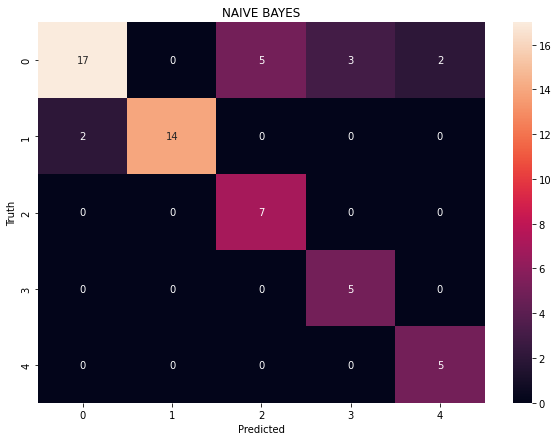

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('NAIVE BAYES')


DECISION TREE

In [ ]:
tr = tree.DecisionTreeClassifier(random_state=45)
tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
y_pred

array([5, 1, 1, 1, 2, 1, 1, 4, 2, 2, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 5,
       2, 1, 1, 1, 2, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 5, 4,
       2, 4, 2, 2, 3, 2, 2, 2, 1, 5, 3, 5, 4, 1, 1, 1])

In [ ]:
tr_acc = accuracy_score(y_test, y_pred)
print('Accuracy_score : ', tr_acc)


Accuracy_score :  0.9833333333333333


In [ ]:
tr_train_score = tr.score(X_train, y_train)
tr_test_score = tr.score(X_test, y_test)
print('Decision Tree Classifier Test Score is : ', tr_test_score)
print('Decision Tree Classifier Train Score is : ', tr_train_score)


Decision Tree Classifier Test Score is :  0.9833333333333333
Decision Tree Classifier Train Score is :  1.0


In [ ]:
tr_acc = 100*tr.score(X_test, y_test)
print('Decision Tree Classifier Predictions: \n',tr.predict(X_test), '\n Accuracy:', tr_acc, '%')


Decision Tree Classifier Predictions: 
 [5 1 1 1 2 1 1 4 2 2 1 2 3 1 1 1 3 2 1 1 2 5 2 1 1 1 2 2 3 4 1 1 1 1 1 1 1
 1 1 3 3 1 5 4 2 4 2 2 3 2 2 2 1 5 3 5 4 1 1 1] 
 Accuracy: 98.33333333333333 %


In [ ]:
report = classification_report(y_test, y_pred)
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred))
print()
print("Classicfication Report : ")
print(report)




Confusion Matrix : 
[[27  0  0  0  0]
 [ 1 15  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  5]]

Classicfication Report : 
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        27
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



Text(0.5, 1.0, 'DECISION TREE')

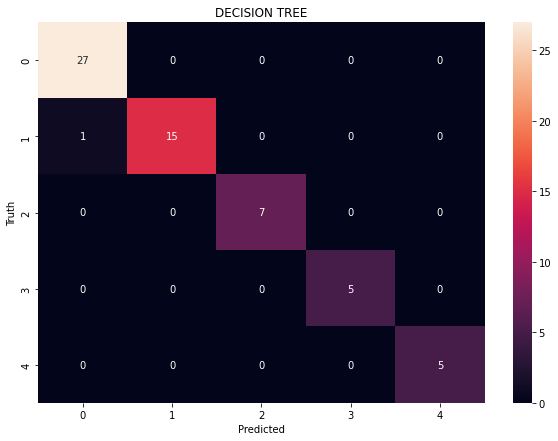

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('DECISION TREE')
